# Some experiments in Gaussian Processes Regression
> Using GPy

- toc: true 
- badges: true
- comments: true
- author: Nipun Batra
- categories: [ML]

### Disclaimer

This blog post is forked from [GPSS 2019](http://gpss.cc/gpss19/) [Lab 1](https://nbviewer.jupyter.org/github/gpschool/labs/blob/2019/2019/.answers/lab_1.ipynb). This is produced only for educational purposes. All credit goes to the GPSS organisers. 

In [1]:
# Support for maths
import numpy as np
# Plotting tools
from matplotlib import pyplot as plt
# we use the following for plotting figures in jupyter
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# GPy: Gaussian processes library
import GPy
from IPython.display import display


### Covariance functions, aka kernels

We will define a covariance function, from hereon referred to as a kernel, using `GPy`. The most commonly used kernel in machine learning is the Gaussian-form radial basis function (RBF) kernel. It is also commonly referred to as the exponentiated quadratic or squared exponential kernel &ndash; all are equivalent.

The definition of the (1-dimensional) RBF kernel has a Gaussian-form, defined as:

$$
    \kappa_\mathrm{rbf}(x,x') = \sigma^2\exp\left(-\frac{(x-x')^2}{2\mathscr{l}^2}\right)
$$

It has two parameters, described as the variance, $\sigma^2$ and the lengthscale $\mathscr{l}$.

In GPy, we define our kernels using the input dimension as the first argument, in the simplest case `input_dim=1` for 1-dimensional regression. We can also explicitly define the parameters, but for now we will use the default values:

In [2]:
# Create a 1-D RBF kernel with default parameters
k = GPy.kern.RBF(1)
# Preview the kernel's parameters
k.variance

index,rbf.variance,constraints,priors
[0],1.00000000,+ve,


We can see from the above table that our kernel has two parameters, `variance` and `lengthscale`, both with value `1.0`. There is also information on the constraints and priors on each parameter, but we will look at this later.

### Visualising the kernel

We can visualise our kernel in a few different ways. We can plot the _shape_ of the kernel by plotting $k(x,0)$ over some sample space $x$ which, looking at the equation above, clearly has a Gaussian shape. This describes the covariance between each sample location and $0$.

In [3]:
# Our sample space: 100 samples in the interval [-4,4]
X = np.linspace(-4.,4.,100)[:, None] # we need [:, None] to reshape X into a column vector for use in GPy

# First, sample kernel at x' = 0
K = k.K(X, np.array([[0.]])) # k(x,0)

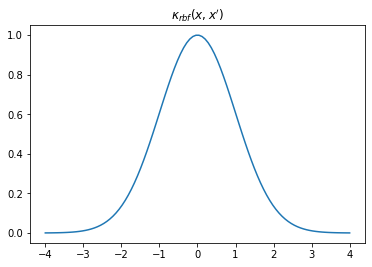

In [4]:
plt.plot(X, K)
plt.title("$\kappa_{rbf}(x,x')$");

In [5]:
fig, ax = plt.subplots()
from matplotlib.animation import FuncAnimation
from matplotlib import rc
ls = [0.05, 0.25, 0.5, 1., 2., 4.]



def update(iteration):
    ax.cla()
    k = GPy.kern.RBF(1)
    k.lengthscale = ls[iteration]
    # Calculate the new covariance function at k(x,0)
    C = k.K(X, np.array([[0.]]))
    # Plot the resulting covariance vector
    ax.plot(X,C)
    ax.set_title("$\kappa_{rbf}(x,x')$\nLength scale = %s" %k.lengthscale[0]);
    ax.set_ylim((0, 1.2))



num_iterations = len(ls)
anim = FuncAnimation(fig, update, frames=np.arange(0, num_iterations-1, 1), interval=500)
plt.close()

rc('animation', html='jshtml')
anim

In [6]:
fig, ax = plt.subplots()
import os
from matplotlib.animation import FuncAnimation
from matplotlib import rc
variances = [0.01, 0.05, 0.25, 0.5, 1., 2., 4.]



def update(iteration):
    ax.cla()
    k = GPy.kern.RBF(1)
    k.variance = variances[iteration]
    # Calculate the new covariance function at k(x,0)
    C = k.K(X, np.array([[0.]]))
    # Plot the resulting covariance vector
    ax.plot(X,C)
    ax.set_title("$\kappa_{rbf}(x,x')$\nVariance = %s" %k.variance[0]);
    ax.set_ylim((0, 2))

num_iterations = len(ls)
anim = FuncAnimation(fig, update, frames=np.arange(0, num_iterations-1, 1), interval=500)
plt.close()

rc('animation', html='jshtml')
anim

Alternatively, we can construct a full covariance matrix, $\mathbf{K}_{xx} \triangleq k(x,x')$ with samples $x = x'$. The resulting GP prior is a multivariate normal distribution over the space of samples $x$: $\mathcal{N}(\mathbf{0}, \mathbf{K}_{xx})$. It should be evident then that the elements of the matrix represents the covariance between respective points in $x$ and $x'$, and that it is exactly $\sigma^2[=1]$ in the diagonal.


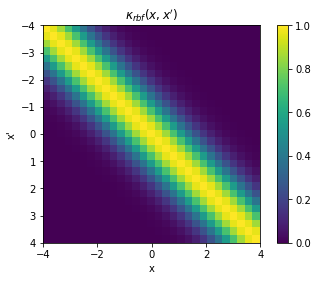

In [7]:
X = np.linspace(-4.,4.,30)[:, None]
K = k.K(X,X)

# Plot the covariance of the sample space
plt.pcolor(X.T, X, K)

# Format and annotate plot
plt.gca().invert_yaxis(), plt.gca().axis("image")
plt.xlabel("x"), plt.ylabel("x'"), plt.colorbar()
plt.title("$\kappa_{rbf}(x,x')$");

In [8]:
fig, ax = plt.subplots()
cax = fig.add_axes([0.87, 0.2, 0.05, 0.65])



def update(iteration):
    ax.cla()
    cax.cla()
    k = GPy.kern.RBF(1)
    k.lengthscale = ls[iteration]
    # Calculate the new covariance function at k(x,0)
    K = k.K(X,X)

    # Plot the covariance of the sample space
    im = ax.pcolor(X.T, X, K)

    # Format and annotate plot
    ax.invert_yaxis()
    ax.axis("image")
    #ax.colorbar()
    # Plot the resulting covariance vector
    ax.set_title("Length scale = %s" %k.lengthscale[0]);
    #ax.set_ylim((0, 1.2))
    fig.colorbar(im, cax=cax, orientation='vertical')
    fig.tight_layout()



num_iterations = len(ls)
anim = FuncAnimation(fig, update, frames=np.arange(0, num_iterations, 1), interval=500)
plt.close()

rc('animation', html='jshtml')
anim

In [9]:
fig, ax = plt.subplots()
cax = fig.add_axes([0.87, 0.2, 0.05, 0.65])



def update(iteration):
    ax.cla()
    cax.cla()
    k = GPy.kern.RBF(1)
    k.variance = variances[iteration]
    # Calculate the new covariance function at k(x,0)
    K = k.K(X,X)

    # Plot the covariance of the sample space
    im = ax.pcolor(X.T, X, K)

    # Format and annotate plot
    ax.invert_yaxis()
    ax.axis("image")
    #ax.colorbar()
    # Plot the resulting covariance vector
    ax.set_title("Variance = %s" %k.variance[0]);
    #ax.set_ylim((0, 1.2))
    fig.colorbar(im, cax=cax, orientation='vertical')
    fig.tight_layout()



num_iterations = len(ls)
anim = FuncAnimation(fig, update, frames=np.arange(0, num_iterations, 1), interval=500)
plt.close()

rc('animation', html='jshtml')
anim

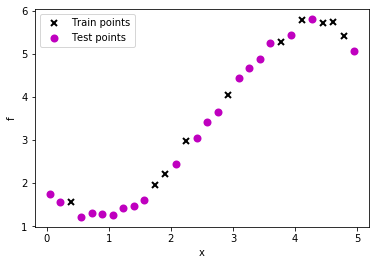

In [10]:
# lambda function, call f(x) to generate data
f = lambda x: 0.4*x**2 - 0.15*x**3 + 0.5*x**2 - 0.002*x**5 + 0.0002*x**6 +0.5*(x-2)**2

np.random.seed(0)
# 30 equally spaced sample locations 
X = np.linspace(0.05, 4.95, 30)[:,None]

np.random.shuffle(X)

# y = f(X) + epsilon
Y = f(X) + np.random.normal(0., 0.1, (30,1)) # note that np.random.normal takes mean and s.d. (not variance), 0.1^2 = 0.01

train_X = X[:10]
train_Y = Y[:10]

test_X = X[10:]
test_Y = Y[10:]

# Plot observations
plt.plot(train_X, train_Y, "kx", mew=2, label='Train points')
plt.plot(test_X, test_Y, "mo", mew=2, label='Test points')



# Annotate plot
plt.xlabel("x"), plt.ylabel("f")
plt.legend()

In [11]:
fig, ax = plt.subplots()


ls = [0.05, 0.25, 0.5, 1., 2., 4.]
from sklearn.metrics import mean_absolute_error



def update(iteration):
    ax.cla()
    k = GPy.kern.RBF(1)
    k.lengthscale = ls[iteration]
    m = GPy.models.GPRegression(train_X, train_Y, k)
    m.Gaussian_noise = 0.0
    m.plot(ax=ax)
    ax.plot(test_X, test_Y, "mo", mew=2, label='Test points')

    ax.legend()
    ax.set_title("Length scale = %s, MAE = %s" %(k.lengthscale[0], mean_absolute_error(test_Y, m.predict_noiseless(test_X)[0].flatten())));
    fig.tight_layout()



num_iterations = len(ls)
anim = FuncAnimation(fig, update, frames=np.arange(0, num_iterations, 1), interval=500)
plt.close()

rc('animation', html='jshtml')
anim


In [12]:
fig, ax = plt.subplots()


ls = [0.05, 0.25, 0.5, 1., 2., 4.]
from sklearn.metrics import mean_absolute_error



def update(iteration):
    ax.cla()
    k = GPy.kern.RBF(1)
    k.lengthscale = ls[iteration]
    m = GPy.models.GPRegression(train_X, train_Y, k)
    m.plot(ax=ax)
    ax.plot(test_X, test_Y, "mo", mew=2, label='Test points')

    ax.legend()
    ax.set_title("Length scale = %s, MAE = %s" %(k.lengthscale[0], mean_absolute_error(test_Y, m.predict_noiseless(test_X)[0].flatten())));
    fig.tight_layout()



num_iterations = len(ls)
anim = FuncAnimation(fig, update, frames=np.arange(0, num_iterations, 1), interval=500)
plt.close()

rc('animation', html='jshtml')
anim



In [13]:
k = GPy.kern.RBF(1)
m = GPy.models.GPRegression(train_X, train_Y, k)
m.optimize()

In [14]:
m

GP_regression.,value,constraints,priors
rbf.variance,12.433073229235813,+ve,
rbf.lengthscale,2.3466333974531643,+ve,
Gaussian_noise.variance,0.017278356392145047,+ve,


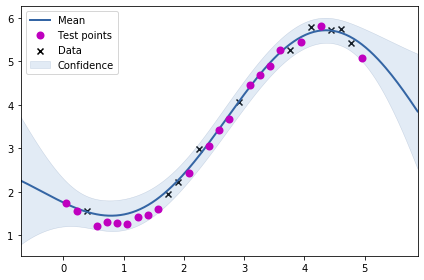

In [15]:
m.plot()
ax = plt.gca()
ax.plot(test_X, test_Y, "mo", mew=2, label='Test points')

ax.legend()

In [16]:
mean_absolute_error(test_Y, m.predict(test_X)[0].flatten())

0.1261412756644968

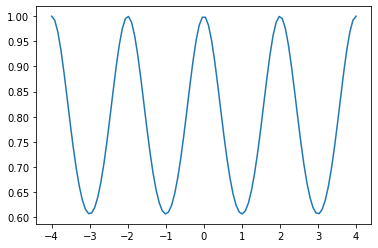

In [17]:
k = GPy.kern.StdPeriodic(1, period=2)
data = np.linspace(-4.,4.,100)[:, None]
C = k.K(data, np.array([[0.]]))

plt.plot(data,C)

In [18]:
m = GPy.models.GPRegression(train_X, train_Y, k)
m.optimize()

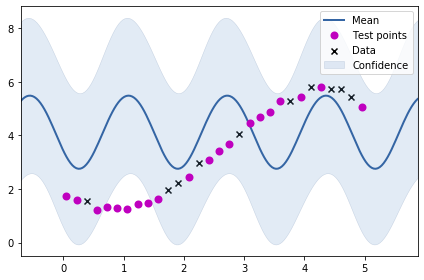

In [19]:
m.plot()
ax = plt.gca()
ax.plot(test_X, test_Y, "mo", mew=2, label='Test points')

ax.legend()

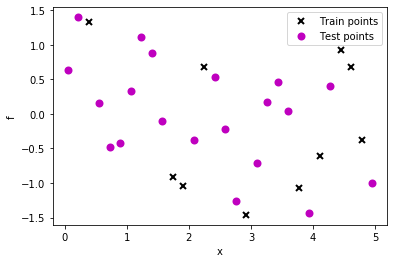

In [20]:
# lambda function, call f(x) to generate data
g = lambda x: np.sin(6*x) + 0.5*np.cos(x)

np.random.seed(0)
# 30 equally spaced sample locations 
X2 = np.linspace(0.05, 4.95, 30)[:,None]

np.random.shuffle(X2)

# y = f(X) + epsilon
Y2 = g(X2) + np.random.normal(0., 0.1, (30,1)) # note that np.random.normal takes mean and s.d. (not variance), 0.1^2 = 0.01

train_X2 = X2[:10]
train_Y2 = Y2[:10]

test_X2 = X2[10:]
test_Y2 = Y2[10:]

# Plot observations
plt.plot(train_X2, train_Y2, "kx", mew=2, label='Train points')
plt.plot(test_X2, test_Y2, "mo", mew=2, label='Test points')



# Annotate plot
plt.xlabel("x"), plt.ylabel("f")
plt.legend()

In [21]:
m = GPy.models.GPRegression(train_X, train_Y, k)
m.optimize()

In [22]:
m

GP_regression.,value,constraints,priors
std_periodic.variance,19.278854335525615,+ve,
std_periodic.period,1.6387128992865987,+ve,
std_periodic.lengthscale,1.9692470808309708,+ve,
Gaussian_noise.variance,1.6664680884037004,+ve,


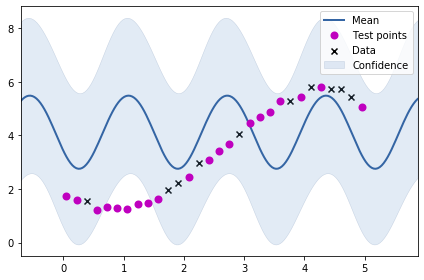

In [23]:
m.plot()
ax = plt.gca()
ax.plot(test_X, test_Y, "mo", mew=2, label='Test points')

ax.legend()

In [24]:
k1 = GPy.kern.StdPeriodic(1, period=2)
k2 = GPy.kern.RBF(1, lengthscale=1)
k_combined_1 = k1+k2
k_combined_2 = k1*k2

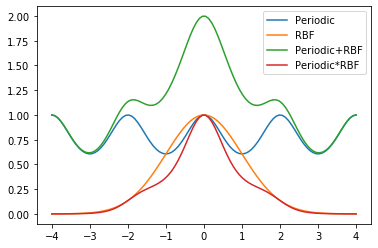

In [25]:
C1 = k_combined_1.K(data, np.array([[0.]]))
C2 = k_combined_2.K(data, np.array([[0.]]))


plt.plot(data,k1.K(data, np.array([[0.]])),label="Periodic")
plt.plot(data,k2.K(data, np.array([[0.]])),label="RBF")



plt.plot(data,C1,label="Periodic+RBF")
plt.plot(data,C2,label="Periodic*RBF")
plt.legend()

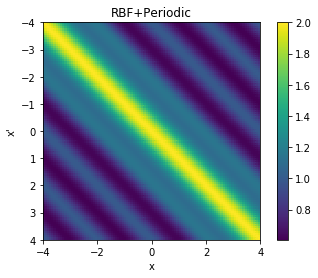

In [26]:
cov = k_combined_1.K(data,data)

# Plot the covariance of the sample space
plt.pcolor(data.T, data, cov)

# Format and annotate plot
plt.gca().invert_yaxis(), plt.gca().axis("image")
plt.xlabel("x"), plt.ylabel("x'"), plt.colorbar()
plt.title("RBF+Periodic");

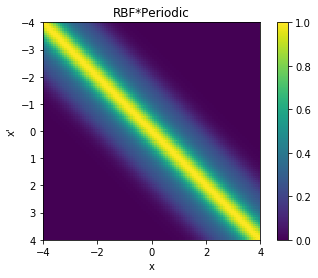

In [27]:
cov = k_combined_2.K(data,data)

# Plot the covariance of the sample space
plt.pcolor(data.T, data, cov)

# Format and annotate plot
plt.gca().invert_yaxis(), plt.gca().axis("image")
plt.xlabel("x"), plt.ylabel("x'"), plt.colorbar()
plt.title("RBF*Periodic");

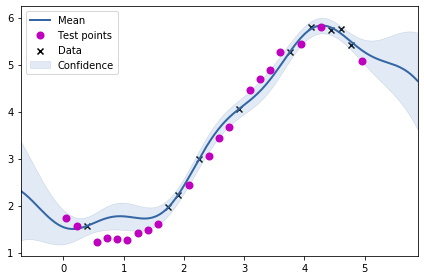

In [28]:
m = GPy.models.GPRegression(train_X, train_Y, k_combined_1)
m.optimize()
m.plot()
ax = plt.gca()
ax.plot(test_X, test_Y, "mo", mew=2, label='Test points')

ax.legend()

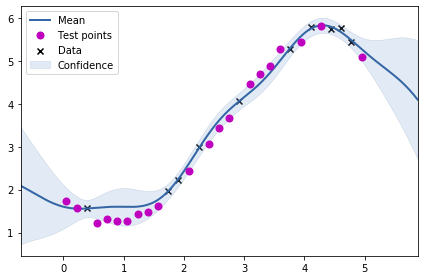

In [29]:
m = GPy.models.GPRegression(train_X, train_Y, k_combined_2)
m.optimize()
m.plot()
ax = plt.gca()
ax.plot(test_X, test_Y, "mo", mew=2, label='Test points')

ax.legend()

### 2D GP

In [30]:
X = np.array([[3, 2], [1, 4], [1, 1], [3, 4], [2,2], [2, 3], [3, 1], [3, 3.5], [2.5, 3.5]])
y = np.array([1, 1, 3, 2, 5.5, 4.5, 0.5, 3, 3.5])

In [31]:
X.shape, y.shape

((9, 2), (9,))

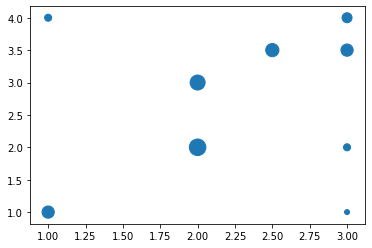

In [32]:
plt.scatter(X[:,0], X[:, 1],s=y*50)

In [33]:
k_2d = GPy.kern.RBF(input_dim=2, lengthscale=1)

In [34]:
X.shape

(9, 2)

In [35]:
m = GPy.models.GPRegression(X, y.reshape(-1, 1), k_2d)
m.optimize()

In [36]:
m.predict_noiseless(X[:1])

(array([[1.0000008]]), array([[6.00069019e-07]]))

In [37]:
x_t = np.linspace(0, 4.5, 40)
y_t = np.linspace(0, 4.5, 40)

XX, YY = np.meshgrid(x_t, y_t)

In [38]:
Z_pred = np.zeros_like(YY)
for i in range(40):
    for j in range(40):
        Z_pred[i, j] = m.predict(np.array([XX[i, j], YY[i, j]]).reshape(1, 2))[0]

In [39]:
Z_pred.shape

(40, 40)

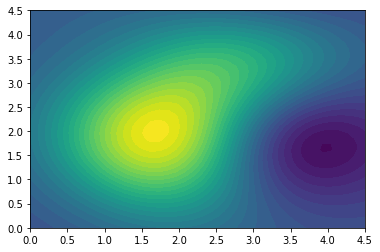

In [40]:
plt.contourf(XX, YY, Z_pred, levels=30,)
#plt.scatter(X[:,0], X[:, 1],s=y*50,c='k')

{'dataplot': [<matplotlib.collections.PathCollection at 0x1260b3850>],
 'gpmean': [<matplotlib.contour.QuadContourSet at 0x1260b3e90>]}

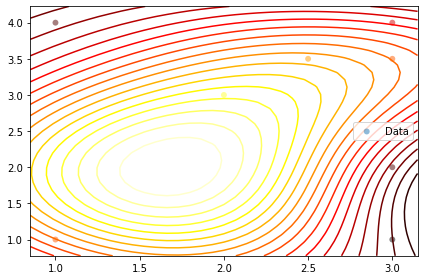

In [41]:
m.plot()

In [42]:
Z_var = np.zeros_like(YY)
for i in range(40):
    for j in range(40):
        Z_var[i, j] = m.predict(np.array([XX[i, j], YY[i, j]]).reshape(1, 2))[1]

We can see the selected parameters in the model table above. The regression fit with the optimised parameters can be plotted:

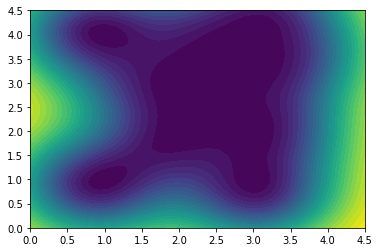

In [43]:
plt.contourf(XX, YY, Z_var, levels=30)


## Air quality 2d map 

